In [37]:
!pip install yfinance
!pip install fredapi
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas

In [38]:
import pandas as pd
from fredapi import Fred
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Retreiving

## i. Enter the needed quotes

In [39]:
fred_data = {
    'GDP': 'GDP',
    'CPI': 'CPIAUCSL',
    'UNRATE': 'UNRATE',
    'FEDFUNDS': 'FEDFUNDS',
    'CCI': 'UMCSENT'
}

fred = Fred(api_key='cbd136333ef1cd65783ab04229be84c1')

tickers = {
    'NYSE': '^NYA',
    'Tokyo Stock Exchange': '^N225',
    'Euronext 100': '^N100',
    'Toronto Stock Exchange': '^GSPTSE',
    'Korea Exchange': '^KS11',
    'Shanghai Stock Exchange': '000001.SS',
    'NSE of India': '^NSEI',
    'Saudi Stock Exchange': '^TASI.SR',
    'Johannesburg Stock Exchange': 'JSE.JO',
    'Brazil Stock Exchange': '^BVSP'
}

## ii. Retrieve Economic Parameters

In [40]:
data = {}
for name, series_id in fred_data.items():
    data[name] = fred.get_series(series_id)

economic_df = pd.DataFrame(data)
economic_df.index.name = 'Date'  # Set index name to 'Date'
economic_df.reset_index(inplace=True)  # Reset index to create 'Date' column

economic_df = economic_df[(economic_df['Date'] >= '1990-01-01') & (economic_df['Date'] != '2024-10-11')]  # Filter date from 1990 and exclude September 2024

economic_df

,Date,GDP,CPI,UNRATE,FEDFUNDS,CCI
520,1990-01-01,5872.701,127.500,5.4,8.23,93.0
521,1990-02-01,NaN,128.000,5.3,8.24,89.5
522,1990-03-01,NaN,128.600,5.2,8.28,91.3
523,1990-04-01,5960.028,128.900,5.4,8.26,93.9
524,1990-05-01,NaN,129.100,5.4,8.18,90.6
...,...,...,...,...,...,...
932,2024-05-01,NaN,313.225,4.0,5.33,69.1
933,2024-06-01,NaN,313.049,4.1,5.33,68.2
934,2024-07-01,NaN,313.534,4.3,5.33,66.4
935,2024-08-01,NaN,314.121,4.2,5.33,67.9


## iii. Retrieve Stock Data

In [41]:
stock_data_list = []
for name, ticker in tickers.items():
    data = yf.download(ticker, start='1990-01-01', end='2024-10-11', interval='1d')
    data['Index'] = name
    data = data.ffill()
    stock_data_list.append(data.reset_index())

stock_data_df = pd.concat(stock_data_list, ignore_index=True)

stock_data_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,2093.600098,0,NYSE
1,1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,2091.479980,0,NYSE
2,1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,2075.520020,0,NYSE
3,1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,2058.070068,0,NYSE
4,1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,2065.370117,0,NYSE
...,...,...,...,...,...,...,...,...
68046,2024-10-04,131672.000000,131936.000000,131156.000000,131792.000000,131792.000000,7054700,Brazil Stock Exchange
68047,2024-10-07,131792.000000,132943.000000,131676.000000,132018.000000,132018.000000,7702100,Brazil Stock Exchange
68048,2024-10-08,132016.000000,132016.000000,130371.000000,131512.000000,131512.000000,9093200,Brazil Stock Exchange
68049,2024-10-09,131510.000000,131520.000000,129719.000000,129962.000000,129962.000000,9220400,Brazil Stock Exchange


# 2. Data Cleaning

## i. Extract only the "Close" prices for each index.


In [42]:
pivoted_stock_filtered = stock_data_df.pivot(index='Date', columns='Index', values='Close')

pivoted_stock_filtered = pivoted_stock_filtered.reset_index()

column_order_filtered = ['Date'] + list(tickers.keys())

pivoted_stock_filtered = pivoted_stock_filtered[column_order_filtered]

pivoted_stock_filtered

Index,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange
0,1990-01-02,2093.600098,NaN,NaN,4004.399902,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,2091.479980,NaN,NaN,4009.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,2075.520020,38712.878906,NaN,4000.899902,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,2058.070068,38274.761719,NaN,3990.399902,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,2065.370117,38294.960938,NaN,3971.100098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9350,2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11769.040039,NaN,NaN
9351,2024-10-07,19432.300781,39332.738281,1484.969971,24102.699219,2610.379883,NaN,24795.750000,11913.620117,12500.0,132018.0
9352,2024-10-08,19435.029297,38937.539062,1478.510010,24072.500000,2594.360107,3489.774902,25013.150391,12027.169922,12500.0,131512.0
9353,2024-10-09,19547.089844,39277.960938,1487.589966,24224.900391,NaN,3258.857910,24981.949219,11927.330078,12396.0,129962.0


## ii. Forward Fill missing values in the daily prices data

In [43]:
pivoted_stock_filtered = pivoted_stock_filtered.ffill()
pivoted_stock_filtered

Index,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange
0,1990-01-02,2093.600098,NaN,NaN,4004.399902,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,2091.479980,NaN,NaN,4009.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,2075.520020,38712.878906,NaN,4000.899902,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,2058.070068,38274.761719,NaN,3990.399902,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,2065.370117,38294.960938,NaN,3971.100098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9350,2024-10-06,19538.679688,38635.621094,1483.459961,24162.800781,2569.709961,3336.497070,25014.599609,11769.040039,12580.0,131792.0
9351,2024-10-07,19432.300781,39332.738281,1484.969971,24102.699219,2610.379883,3336.497070,24795.750000,11913.620117,12500.0,132018.0
9352,2024-10-08,19435.029297,38937.539062,1478.510010,24072.500000,2594.360107,3489.774902,25013.150391,12027.169922,12500.0,131512.0
9353,2024-10-09,19547.089844,39277.960938,1487.589966,24224.900391,2594.360107,3258.857910,24981.949219,11927.330078,12396.0,129962.0


# 3. Merge the Data (by Date)

In [44]:
pivoted_stock_filtered['Date'] = pd.to_datetime(pivoted_stock_filtered['Date'])
economic_df['Date'] = pd.to_datetime(economic_df['Date'])

pivoted_stock_date = pivoted_stock_filtered.set_index('Date')
economic_df_date = economic_df.set_index('Date')

pivoted_stock_resampled = pivoted_stock_date.reindex(economic_df_date.index, method='ffill')

pivoted_stock_resampled_reset = pivoted_stock_resampled.reset_index()
economic_df_reset = economic_df_date.reset_index()

merged_df = pd.merge(pivoted_stock_resampled_reset, economic_df_reset, on='Date', how='left')

merged_df

,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange,GDP,CPI,UNRATE,FEDFUNDS,CCI
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5872.701,127.500,5.4,8.23,93.0
1,1990-02-01,1919.339966,37206.421875,NaN,3709.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.000,5.3,8.24,89.5
2,1990-03-01,1940.489990,33829.578125,NaN,3700.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.600,5.2,8.28,91.3
3,1990-04-01,1975.699951,29980.449219,NaN,3639.500000,NaN,NaN,NaN,NaN,NaN,NaN,5960.028,128.900,5.4,8.26,93.9
4,1990-05-01,1926.750000,29689.830078,NaN,3334.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.100,5.4,8.18,90.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-05-01,17576.390625,38274.050781,1503.609985,21728.599609,2692.060059,3104.824951,22604.849609,12345.650391,8594.0,125924.0,NaN,313.225,4.0,5.33,69.1
413,2024-06-01,18083.689453,38487.898438,1530.660034,22269.099609,2636.520020,3086.812988,22530.699219,11503.490234,9204.0,122098.0,NaN,313.049,4.1,5.33,68.2
414,2024-07-01,17957.050781,39631.058594,1496.859985,21875.800781,2804.310059,2994.729980,24141.949219,11658.530273,10780.0,124718.0,NaN,313.534,4.3,5.33,66.4
415,2024-08-01,18493.230469,38126.328125,1463.530029,22723.199219,2777.679932,2932.386963,25010.900391,12045.780273,10720.0,127395.0,NaN,314.121,4.2,5.33,67.9


# 4. Data Visualization

## i. GDP, CPI, UNRATE, FEDFUNDS, and CCI Over Time

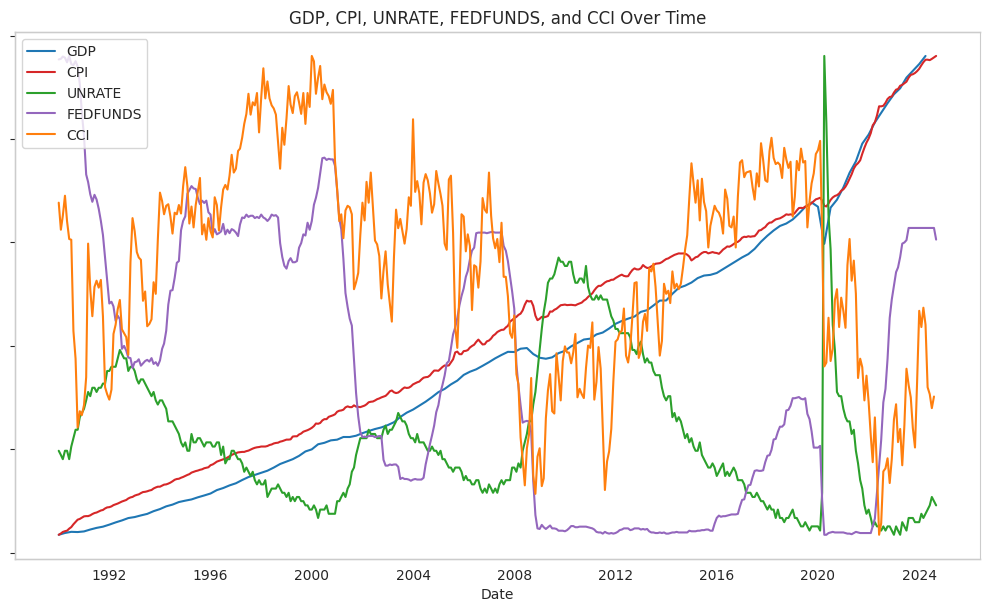

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')

# Filter out the GDP data to plot quarterly
quarterly_gdp = merged_df.dropna(subset=['GDP'])

# Plot quarterly GDP
line1, = ax1.plot(quarterly_gdp['Date'], quarterly_gdp['GDP'], color='tab:blue', label='GDP')
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)
ax1.grid(False)
ax2 = ax1.twinx()
line2, = ax2.plot(merged_df['Date'], merged_df['CPI'], color='tab:red', label='CPI')
ax2.tick_params(axis='y', which='both', left=False, labelleft=False, right=False, labelright=False)
ax2.grid(False)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move the third axis outward
line3, = ax3.plot(merged_df['Date'], merged_df['UNRATE'], color='tab:green', label='UNRATE')
ax3.tick_params(axis='y', which='both', left=False, labelleft=False, right=False, labelright=False)
ax3.grid(False)

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # move the fourth axis outward
line4, = ax4.plot(merged_df['Date'], merged_df['FEDFUNDS'], color='tab:purple', label='FEDFUNDS')
ax4.tick_params(axis='y', which='both', left=False, labelleft=False, right=False, labelright=False)
ax4.grid(False)

ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))  # move the fifth axis outward
line5, = ax5.plot(merged_df['Date'], merged_df['CCI'], color='tab:orange', label='CCI')
ax5.tick_params(axis='y', which='both', left=False, labelleft=False, right=False, labelright=False)
ax5.grid(False)

ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['right'].set_visible(False)

# Adding a legend for the colors
lines = [line1, line2, line3, line4, line5]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Title and layout adjustments
fig.tight_layout()
plt.title('GDP, CPI, UNRATE, FEDFUNDS, and CCI Over Time')
plt.show()

## ii. Stock Index Prices Over Time

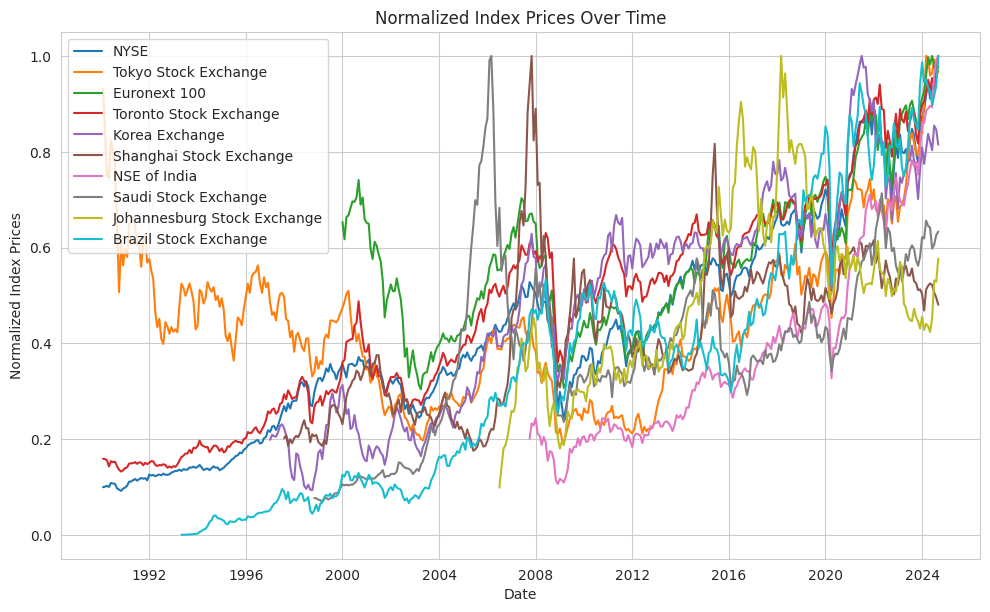

In [46]:
index_columns = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange',
                 'Korea Exchange', 'Shanghai Stock Exchange', 'NSE of India',
                 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

normalized_index = merged_df[index_columns].apply(lambda x: x / x.max())

fig, ax = plt.subplots(figsize=(10, 6))

for index in index_columns:
    ax.plot(merged_df['Date'], normalized_index[index], label=index)

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Index Prices')
plt.legend(loc='upper left')

fig.tight_layout()
plt.title('Normalized Index Prices Over Time')

plt.show()

# 5. Correlation

## i. Regular Correlation

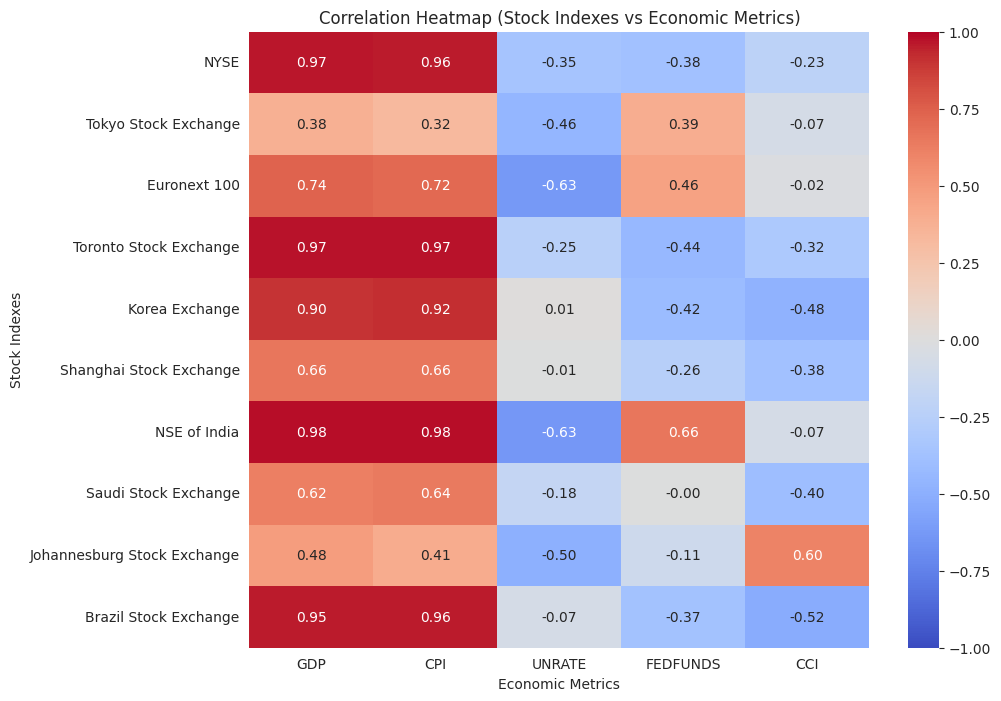

In [47]:
indexes_and_metrics = index_columns + ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']

data_subset = merged_df[indexes_and_metrics]

correlation_matrix = data_subset.corr()

economic_metrics = ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']

correlation_subset = correlation_matrix.loc[index_columns, economic_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Indexes vs Economic Metrics)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()


The heatmap shows that the NYSE, Toronto Stock Exchange, and NSE of India have strong positive correlations with U.S. economic metrics like GDP and CPI, indicating these exchanges are more influenced by these factors. In contrast, the Unemployment Rate (UNRATE) and Consumer Confidence Index (CCI) tend to have negative correlations with most stock indexes. Notably, Tokyo Stock Exchange has weaker correlations across the board, while Johannesburg Stock Exchange and Saudi Stock Exchange display mixed correlations with U.S. economic metrics.

## ii. Periods correlation

### a. 3 years

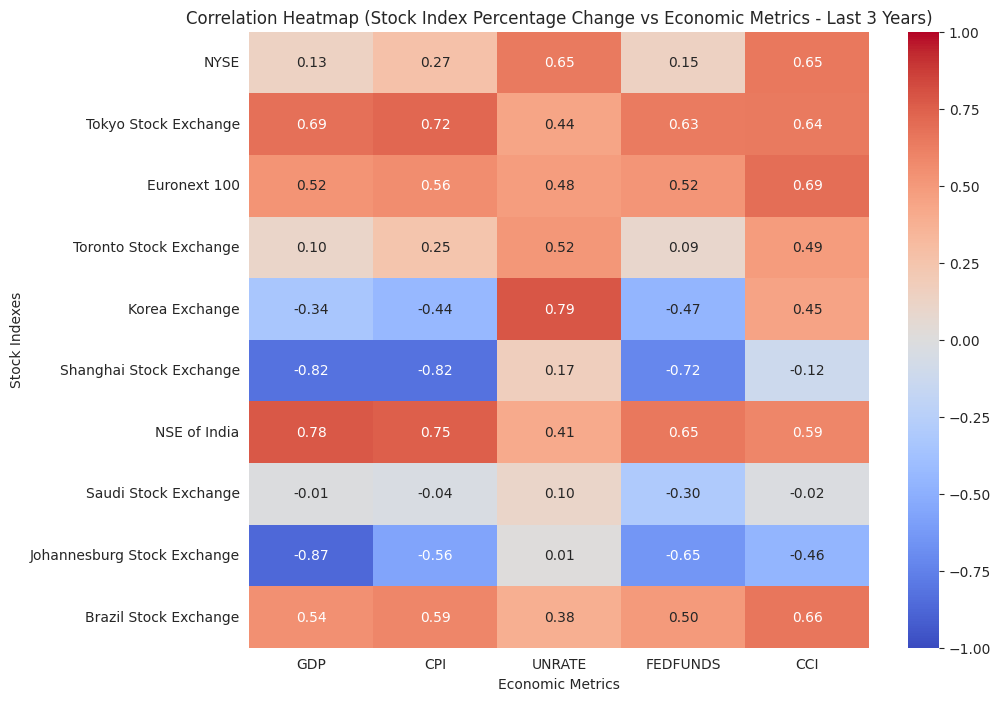

In [48]:
# Ensure the Date column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
three_years_ago = latest_date - pd.DateOffset(years=3)
filtered_data = merged_df[merged_df['Date'] >= three_years_ago]

indexes_and_metrics = index_columns + ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_3_years = data_subset.corr()

correlation_subset_last_3_years = correlation_matrix_last_3_years.loc[index_columns, economic_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_3_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 3 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### b. 10 years

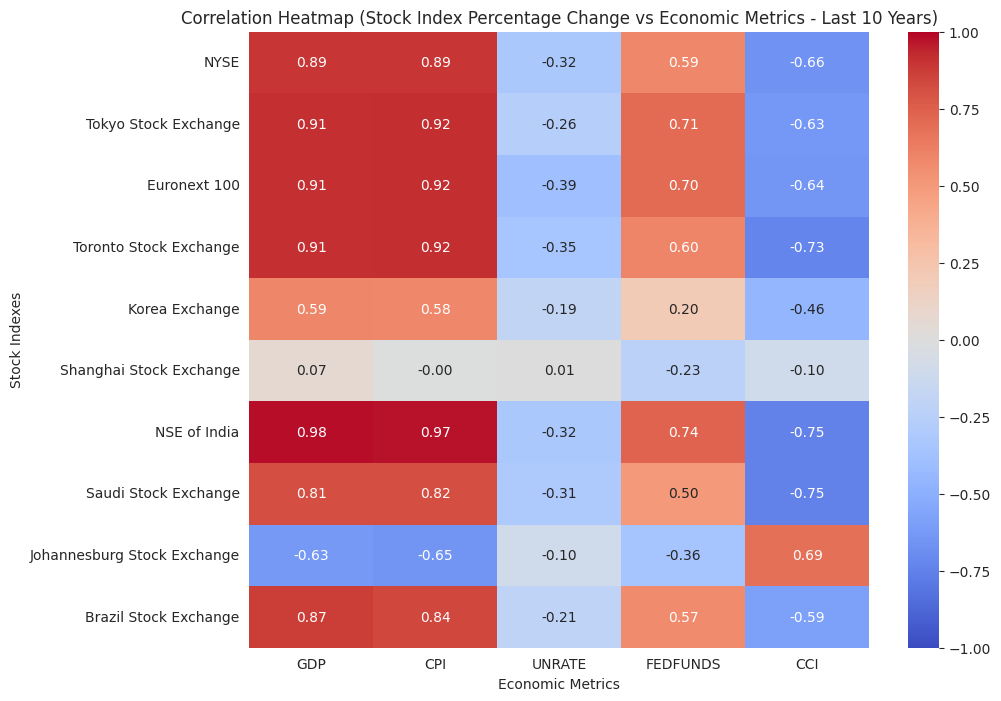

In [49]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
ten_years_ago = latest_date - pd.DateOffset(years=10)
filtered_data = merged_df[merged_df['Date'] >= ten_years_ago]


indexes_and_metrics = index_columns + ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_3_years = data_subset.corr()

correlation_subset_last_3_years = correlation_matrix_last_3_years.loc[index_columns, economic_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_3_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 10 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### c. 20 years

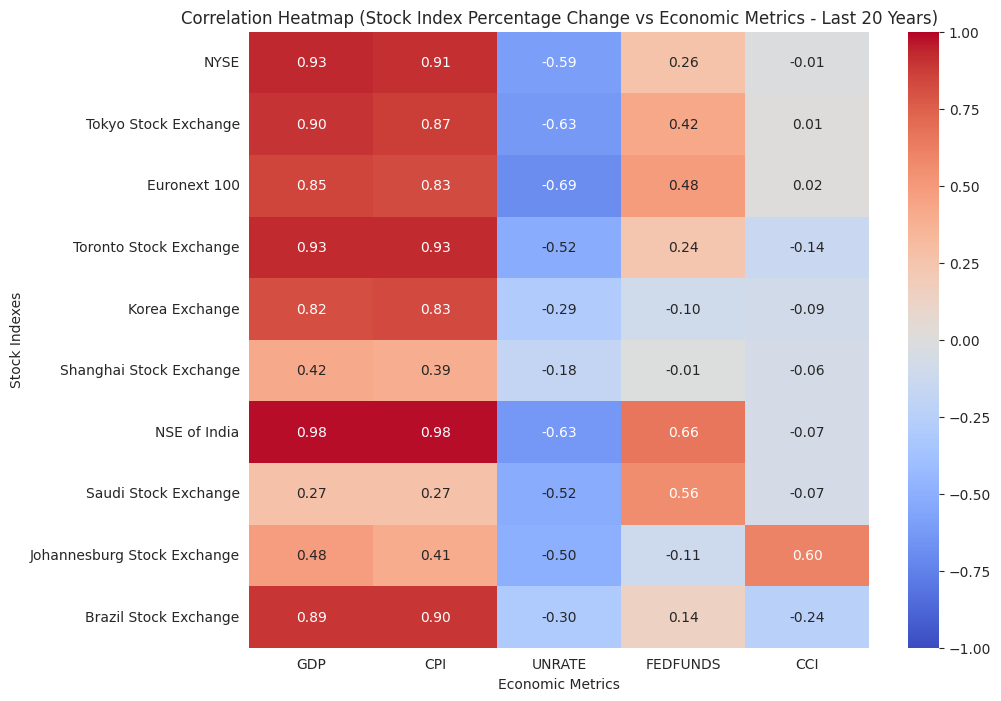

In [50]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
twenty_years_ago = latest_date - pd.DateOffset(years=20)
filtered_data = merged_df[merged_df['Date'] >= twenty_years_ago]

indexes_and_metrics = index_columns + ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_3_years = data_subset.corr()

correlation_subset_last_3_years = correlation_matrix_last_3_years.loc[index_columns, economic_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_3_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 20 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### d. Visualization Check

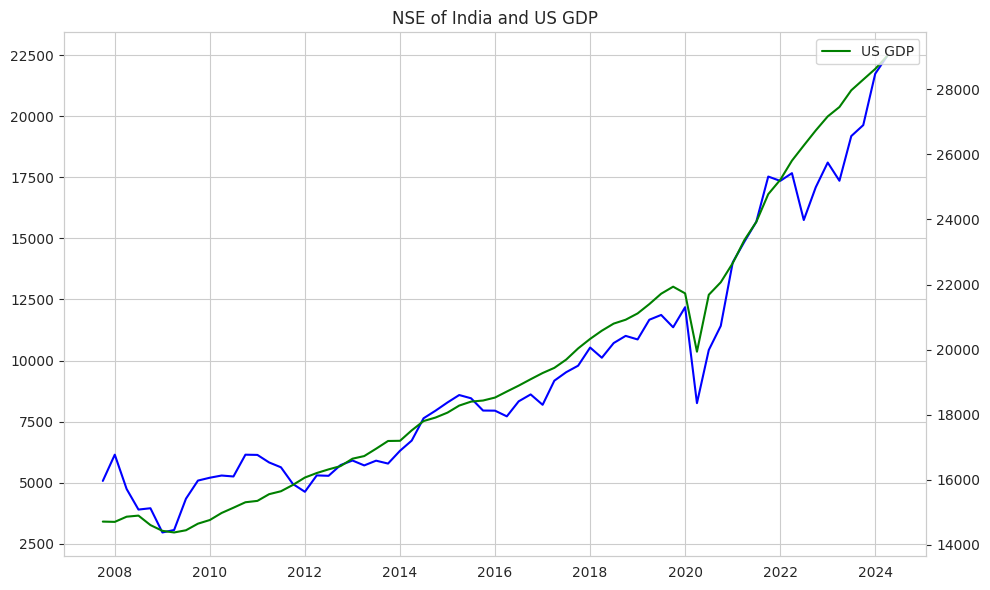

In [51]:
nse_gdp = merged_df[['Date', 'NSE of India', 'GDP']].dropna()

plt.figure(figsize=(10, 6))

plt.plot(nse_gdp['Date'], nse_gdp['NSE of India'], label='NSE of India', color='blue')

ax2 = plt.twinx()
ax2.plot(nse_gdp['Date'], nse_gdp['GDP'], label='US GDP', color='green')

plt.title('NSE of India and US GDP')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

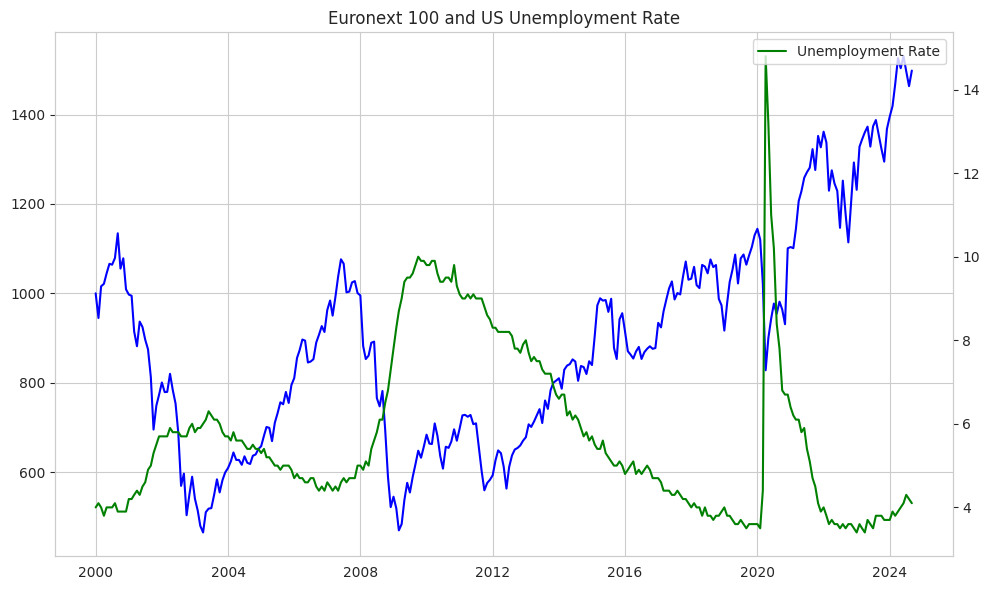

In [52]:
euronext_unrate = merged_df[['Date', 'Euronext 100', 'UNRATE']].dropna()

plt.figure(figsize=(10, 6))

plt.plot(euronext_unrate['Date'], euronext_unrate['Euronext 100'], label='Euronext 100', color='blue')

ax2 = plt.twinx()
ax2.plot(euronext_unrate['Date'], euronext_unrate['UNRATE'], label='Unemployment Rate', color='green')

plt.title('Euronext 100 and US Unemployment Rate')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

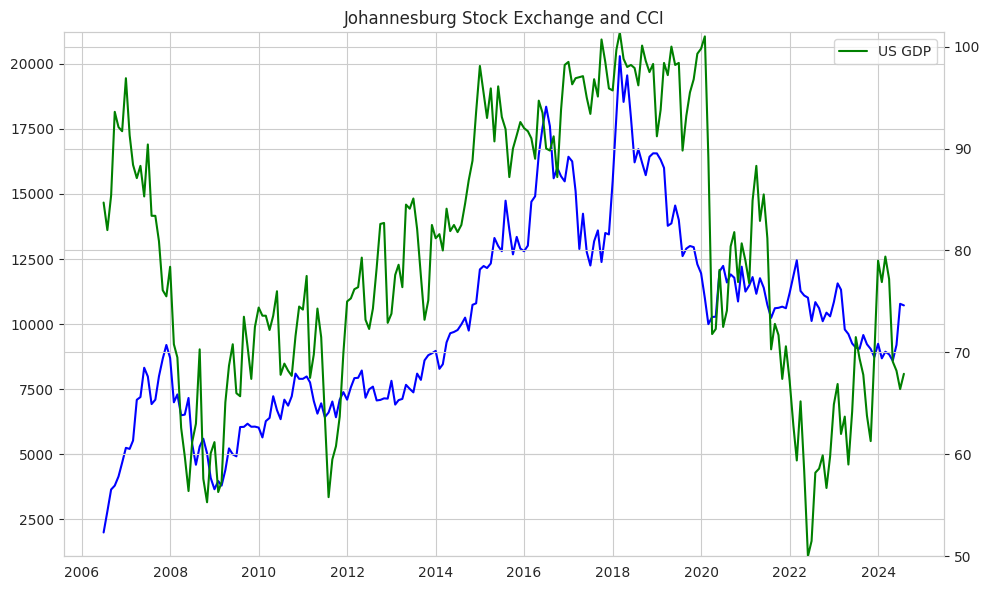

In [53]:
jse_cci = merged_df[['Date', 'Johannesburg Stock Exchange', 'CCI']].dropna()

plt.figure(figsize=(10, 6))

plt.plot(jse_cci['Date'], jse_cci['Johannesburg Stock Exchange'], label='Johannesburg Stock Exchange', color='blue')

ax2 = plt.twinx()
ax2.plot(jse_cci['Date'], jse_cci['CCI'], label='US GDP', color='green')
ax2.set_ylim(jse_cci['CCI'].min(), jse_cci['CCI'].max())

plt.title('Johannesburg Stock Exchange and CCI')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## iii. Correlation with the Flattened Data

As can be seen from the Data Visualization part, stock index prices are trending upward, where the Unemploment Rate, Fed Funds Rate, and CCI are flat. Now we're going to flatten the price data first before make a correlation with it.

In [54]:
merged_pct_df = merged_df[index_columns].diff()

merged_pct_df['Date'] = merged_df['Date']

merged_pct_df = pd.concat([merged_pct_df, merged_df[economic_metrics]], axis=1)
merged_pct_df

,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange,Date,GDP,CPI,UNRATE,FEDFUNDS,CCI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-01,5872.701,127.500,5.4,8.23,93.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990-02-01,NaN,128.000,5.3,8.24,89.5
2,21.150024,-3376.843750,NaN,-8.900146,NaN,NaN,NaN,NaN,NaN,NaN,1990-03-01,NaN,128.600,5.2,8.28,91.3
3,35.209961,-3849.128906,NaN,-60.699951,NaN,NaN,NaN,NaN,NaN,NaN,1990-04-01,5960.028,128.900,5.4,8.26,93.9
4,-48.949951,-290.619141,NaN,-305.399902,NaN,NaN,NaN,NaN,NaN,NaN,1990-05-01,NaN,129.100,5.4,8.18,90.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,-639.798828,-1529.039062,-22.729980,-456.701172,-55.800049,27.446045,142.849609,-77.359375,-246.0,-1066.0,2024-05-01,NaN,313.225,4.0,5.33,69.1
413,507.298828,213.847656,27.050049,540.500000,-55.540039,-18.011963,-74.150391,-842.160156,610.0,-3826.0,2024-06-01,NaN,313.049,4.1,5.33,68.2
414,-126.638672,1143.160156,-33.800049,-393.298828,167.790039,-92.083008,1611.250000,155.040039,1576.0,2620.0,2024-07-01,NaN,313.534,4.3,5.33,66.4
415,536.179688,-1504.730469,-33.329956,847.398438,-26.630127,-62.343018,868.951172,387.250000,-60.0,2677.0,2024-08-01,NaN,314.121,4.2,5.33,67.9


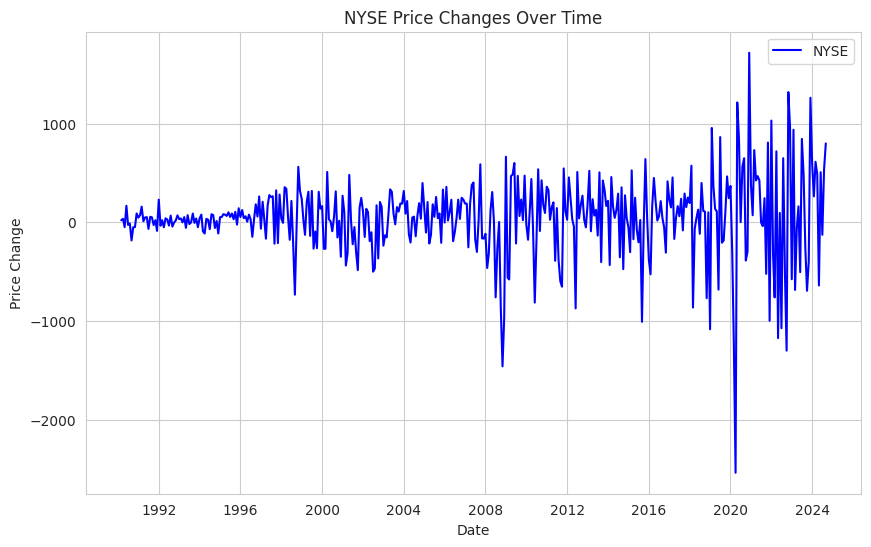

In [56]:
# Show chart of NYSE
plt.figure(figsize=(10, 6))
plt.plot(merged_pct_df['Date'], merged_pct_df['NYSE'], label='NYSE', color='blue')
plt.title('NYSE Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.grid(True)
plt.legend()
plt.show()

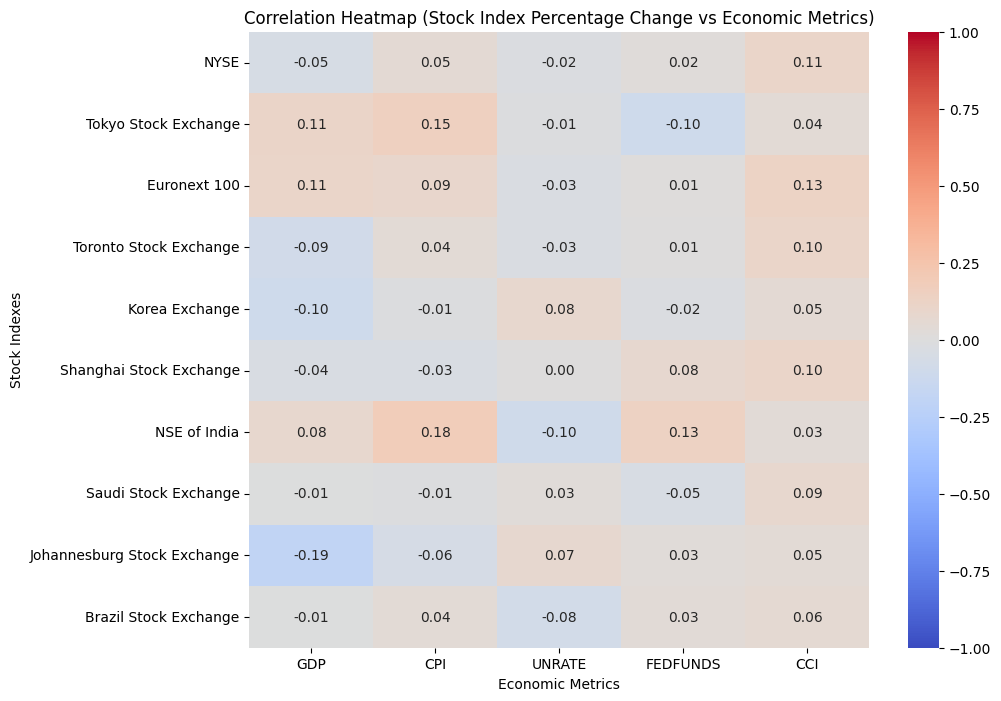

In [22]:
correlation_matrix = merged_pct_df[index_columns + economic_metrics].corr()

correlation_subset = correlation_matrix.loc[index_columns, economic_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

There is no correlation between the index percentage change with the economic matrix.

# 6. HYPOTHESIS #1

HYPOTHESIS: The NYSE (U.S Stock Exchange) have stronger correlation or more senstive with the U.S Economic metrics than the International exchanges with the U.S Economic metrics

Linear Regression

## i. Run the ML to find R2 and RMSE

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Import numpy to calculate the square root for RMSE

filtered_df = merged_df.dropna(subset=['GDP'])  # Filtering rows with non-null GDP values
stock_exchanges = merged_df.columns[1:11]  # Columns for the stock exchanges

filtered_df = filtered_df.dropna(subset=stock_exchanges)

results = {}
for feature in ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']:
    X = filtered_df[[feature]]  # Use a single feature for regression
    for exchange in stock_exchanges:
        y = filtered_df[exchange]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)  # Calculate RMSE
        r2 = r2_score(y, y_pred)
        results[(feature, exchange)] = {'model': model, 'mse': mse, 'rmse': rmse, 'r2': r2}

results

{('GDP', 'NYSE'): {'model': LinearRegression(),
  'mse': 1296048.5198618567,
  'rmse': 1138.4412676382813,
  'r2': 0.8719974590342888},
 ('GDP', 'Tokyo Stock Exchange'): {'model': LinearRegression(),
  'mse': 6218301.596679314,
  'rmse': 2493.6522605767054,
  'r2': 0.8882773588364787},
 ('GDP', 'Euronext 100'): {'model': LinearRegression(),
  'mse': 10112.811431716756,
  'rmse': 100.5624752664569,
  'r2': 0.8294182673047968},
 ('GDP', 'Toronto Stock Exchange'): {'model': LinearRegression(),
  'mse': 1414892.2554741923,
  'rmse': 1189.492436072711,
  'r2': 0.8529398518098145},
 ('GDP', 'Korea Exchange'): {'model': LinearRegression(),
  'mse': 69240.53184128231,
  'rmse': 263.1359569524513,
  'r2': 0.5903860252533634},
 ('GDP', 'Shanghai Stock Exchange'): {'model': LinearRegression(),
  'mse': 401297.1389457999,
  'rmse': 633.4801803890947,
  'r2': 0.05500567886297314},
 ('GDP', 'NSE of India'): {'model': LinearRegression(),
  'mse': 797727.501738102,
  'rmse': 893.1559224111443,
  'r2':

In [24]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.columns = ['Feature', 'Exchange', 'Model', 'MSE', 'RMSE', 'R2']

results_df.drop('Model', axis=1, inplace=True)
results_df

,Feature,Exchange,MSE,RMSE,R2
0,GDP,NYSE,1.296049e+06,1138.441268,0.871997
1,GDP,Tokyo Stock Exchange,6.218302e+06,2493.652261,0.888277
2,GDP,Euronext 100,1.011281e+04,100.562475,0.829418
3,GDP,Toronto Stock Exchange,1.414892e+06,1189.492436,0.852940
4,GDP,Korea Exchange,6.924053e+04,263.135957,0.590386
5,GDP,Shanghai Stock Exchange,4.012971e+05,633.480180,0.055006
6,GDP,NSE of India,7.977275e+05,893.155922,0.966612
7,GDP,Saudi Stock Exchange,1.621246e+06,1273.281436,0.576439
8,GDP,Johannesburg Stock Exchange,9.956230e+06,3155.349430,0.175308
9,GDP,Brazil Stock Exchange,1.765436e+08,13286.972332,0.736444


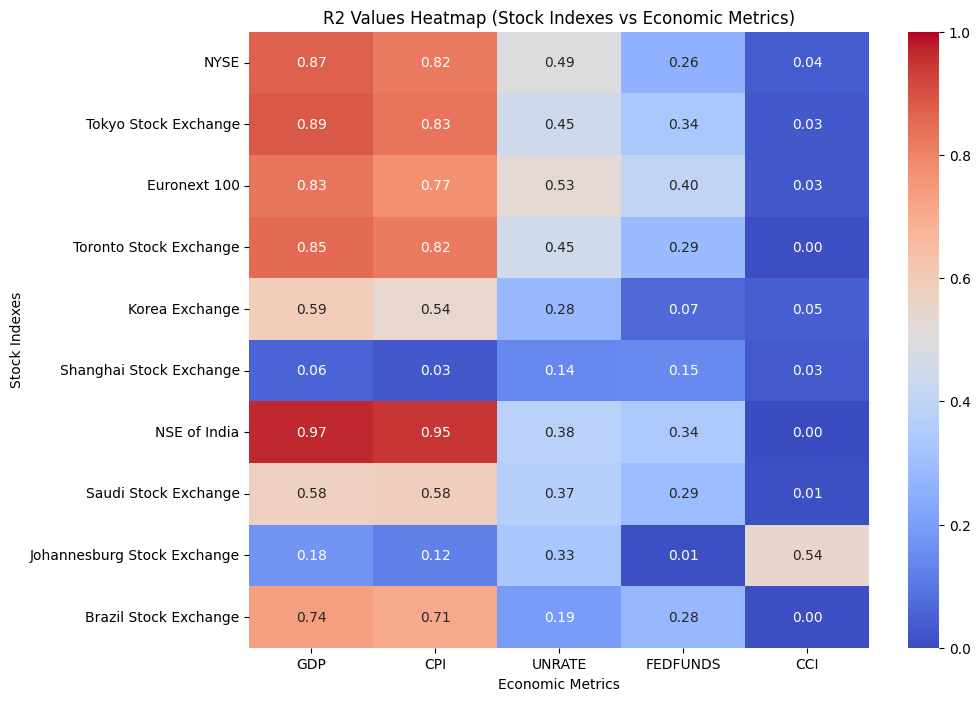

In [25]:
exchange_order = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange',
                 'Korea Exchange', 'Shanghai Stock Exchange', 'NSE of India',
                 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

metric_order = ['GDP', 'CPI', 'UNRATE', 'FEDFUNDS', 'CCI']

pivot_results = results_df.pivot(index='Exchange', columns='Feature', values='R2')

pivot_results = pivot_results.loc[exchange_order, metric_order]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_results, annot=True, cmap="coolwarm", fmt=".2f", vmin=0, vmax=1)
plt.title('R2 Values Heatmap (Stock Indexes vs Economic Metrics)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

In [26]:
average_r2 = results_df.groupby('Exchange')['R2'].mean().reset_index()
average_r2.columns = ['Exchange', 'Average R2']
average_r2

,Exchange,Average R2
0,Brazil Stock Exchange,0.384099
1,Euronext 100,0.512873
2,Johannesburg Stock Exchange,0.235925
3,Korea Exchange,0.305507
4,NSE of India,0.526051
5,NYSE,0.495432
6,Saudi Stock Exchange,0.365191
7,Shanghai Stock Exchange,0.080897
8,Tokyo Stock Exchange,0.507464
9,Toronto Stock Exchange,0.483541


In [27]:
average_rmse = results_df.groupby('Exchange')['RMSE'].mean().reset_index()
average_rmse.columns = ['Exchange', 'Average RMSE']
average_rmse

,Exchange,Average RMSE
0,Brazil Stock Exchange,19664.984071
1,Euronext 100,162.356550
2,Johannesburg Stock Exchange,3012.361335
3,Korea Exchange,337.706004
4,NSE of India,2949.019526
5,NYSE,2125.552059
6,Saudi Stock Exchange,1537.857585
7,Shanghai Stock Exchange,624.486752
8,Tokyo Stock Exchange,4901.028321
9,Toronto Stock Exchange,2102.675768


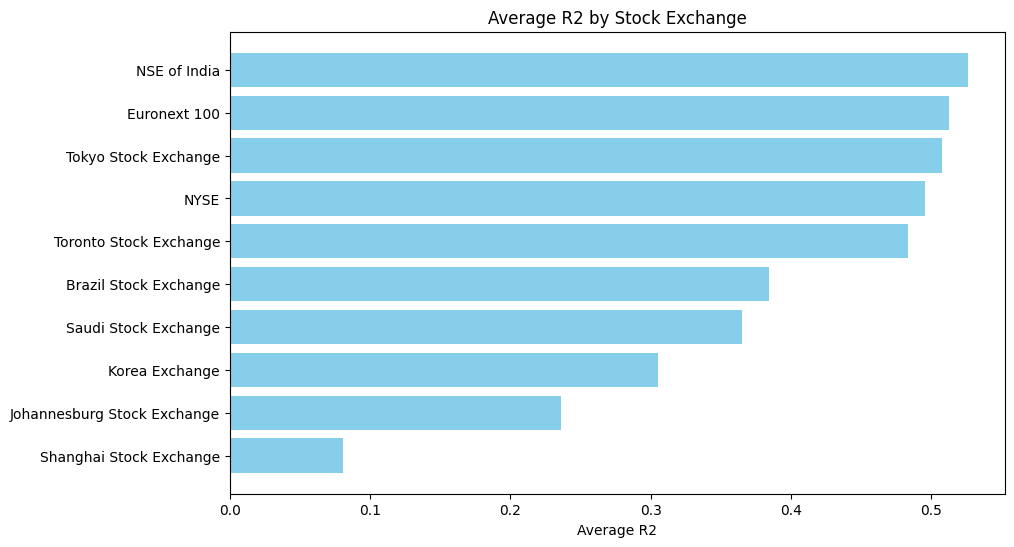

In [28]:
average_r2_sorted = average_r2.sort_values(by='Average R2', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(average_r2_sorted['Exchange'], average_r2_sorted['Average R2'], color='skyblue')
plt.xlabel('Average R2')
plt.title('Average R2 by Stock Exchange')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

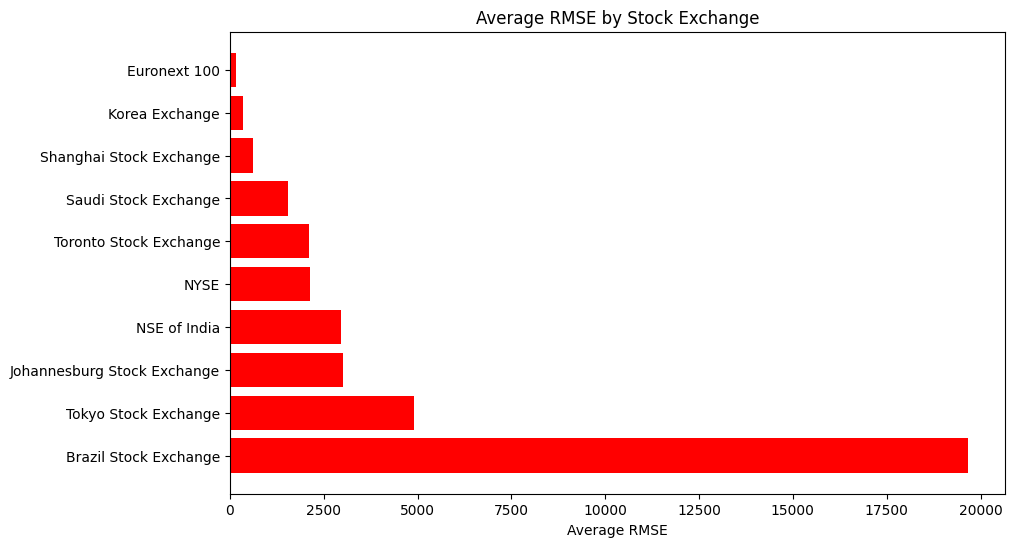

In [29]:
average_rmse_sorted = average_rmse.sort_values(by='Average RMSE', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(average_rmse_sorted['Exchange'], average_rmse_sorted['Average RMSE'], color='red')
plt.xlabel('Average RMSE')
plt.title('Average RMSE by Stock Exchange')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

Null Hypothesis (H0): The correlation of NYSE with the U.S Economic metrics is not stronger or the same with the International exchanges with the U.S Econometrics. Alternative Hypothesis (H1): The NYSE have stronger correlation with the U.S Economic metrics than the International exchanges with the U.S Economic metrics

## ii. Hypothesis Testing (T-test)

In [30]:
from scipy.stats import ttest_ind

# Extract R2 values for NYSE and international stock exchanges
us_r2_values = results_df[results_df['Exchange'] == 'NYSE']['R2'].values
international_r2_values = results_df[results_df['Exchange'] != 'NYSE']['R2'].values

# Perform t-test (one-tailed test for greater mean in NYSE)
t_stat, p_value = ttest_ind(us_r2_values, international_r2_values, equal_var=False, alternative='greater')

# Significance level
alpha = 0.05
reject_null = p_value < alpha

(t_stat, p_value, reject_null)

(0.7059494177510919, 0.25690317893732295, False)

The t-test results indicate that we fail to reject the null hypothesis. This means our Hypothesis is not true based on this t-test because the p-value is above the alpha of 0.05. This indicates that the test failed tor eject the null hypothesis.

# 7. HYPOTHESIS #2

HYPOTHESIS: Stock exchanges in developed countries show a stronger correlation  or more sensitve with U.S. economic metrics compared to those in developing countries

This hypothesis also uses the same ML model as the first hypothesis which is the Linear Regression model.

Null Hypothesis (H0): Stock exchanges in developed countries have no effect or non-significant correlation with U.S. economic metrics compared to those in developing countries
Alternative Hypothesis (H1): Stock exchanges in developed countries show a stronger correlation or more sensitve with the U.S. economic metrics compared to those in developing countries

## i. Hypothesis Testing (T-test)

In [31]:
from scipy.stats import ttest_ind

# Given list of developed and developing exchanges
developed_exchanges = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange', 'Korea Exchange']
developing_exchanges = ['Shanghai Stock Exchange', 'NSE of India', 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

# Extract R2 values for developed and developing exchanges
developed_r2_values = results_df[results_df['Exchange'].isin(developed_exchanges)]['R2'].values
developing_r2_values = results_df[results_df['Exchange'].isin(developing_exchanges)]['R2'].values

# Perform t-test
t_stat, p_value = ttest_ind(developed_r2_values, developing_r2_values, equal_var=False, alternative='greater')

# Significance level
alpha = 0.05
reject_null = p_value < alpha

(t_stat, p_value, reject_null)

(1.6521886776856702, 0.05252373977033702, False)

The t-test results indicate that we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that stock exchanges in developed countries show a stronger correlation with U.S. economic metrics compared to those in developing countries. The p-value is slightly above the significance level of 0.05, suggesting that any observed difference in correlation is not statistically significant. Which mean the changes in the U.S economic metrics do not really affect how developed and developing exchanges perform.

## ii. CALCULATE EACH R-Squared AVERAGE

In [32]:
average_r2_nyse = results_df[results_df['Exchange'] == 'NYSE']['R2'].mean()
average_r2_nyse

0.49543201352620814

In [33]:
average_r2_developed_with_nyse = results_df[results_df['Exchange'].isin(developed_exchanges)]['R2'].mean()
average_r2_developed_with_nyse

0.4609633576609655

In [34]:
average_r2_developing = results_df[results_df['Exchange'].isin(developing_exchanges)]['R2'].mean()
average_r2_developing

0.31843281635469756

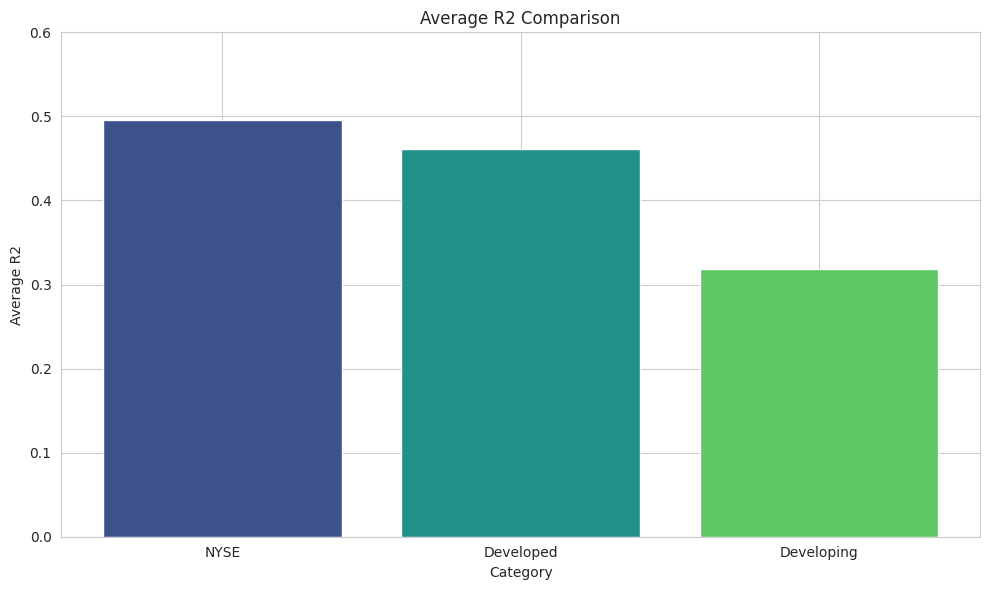

In [35]:
categories = ['NYSE', 'Developed', 'Developing']
average_r2_values = [average_r2_nyse, average_r2_developed_with_nyse, average_r2_developing]

sorted_indices = sorted(range(len(average_r2_values)), key=lambda k: average_r2_values[k], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_values = [average_r2_values[i] for i in sorted_indices]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(categories))  # Use a color palette from seaborn
plt.bar(sorted_categories, sorted_values, color=[colors[i] for i in sorted_indices])
plt.xlabel('Category')
plt.ylabel('Average R2')
plt.title('Average R2 Comparison')
plt.ylim(0, 0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1566/2222071555.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='R2', data=r2_combined, palette='viridis')


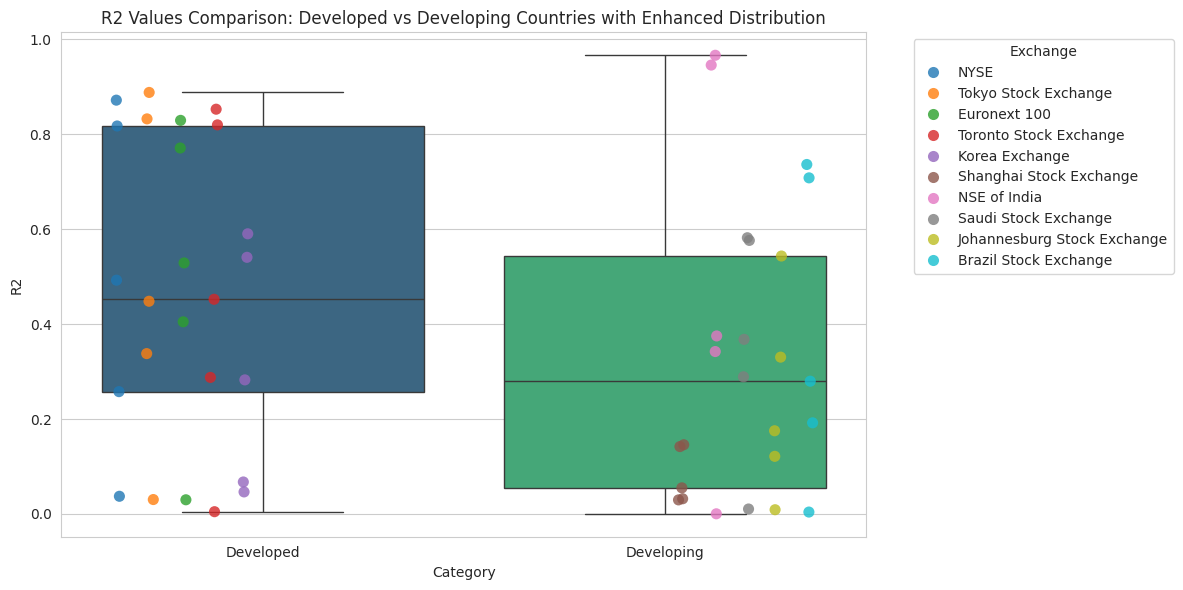

In [36]:
r2_values_developed = results_df[results_df['Exchange'].isin(developed_exchanges)][['Exchange', 'R2']]
r2_values_developing = results_df[results_df['Exchange'].isin(developing_exchanges)][['Exchange', 'R2']]

r2_values_developed['Category'] = 'Developed'
r2_values_developing['Category'] = 'Developing'

r2_combined = pd.concat([r2_values_developed, r2_values_developing])

def detect_outliers(df, category):
    data = df[df['Category'] == category]['R2']

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df['Category'] == category) & ((df['R2'] < lower_bound) | (df['R2'] > upper_bound))]

outliers_developed = detect_outliers(r2_combined, 'Developed')
outliers_developing = detect_outliers(r2_combined, 'Developing')
outliers = pd.concat([outliers_developed, outliers_developing])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='R2', data=r2_combined, palette='viridis')

sns.stripplot(x='Category', y='R2', data=r2_combined, hue='Exchange', palette='tab10',
              alpha=0.8, jitter=True, dodge=True, size=8)

for i in range(outliers.shape[0]):
    plt.text(x=outliers['Category'].iloc[i],
             y=outliers['R2'].iloc[i],
             s=outliers['Exchange'].iloc[i],
             color='black', fontsize=10, weight='bold',
             horizontalalignment='right')

plt.title('R2 Values Comparison: Developed vs Developing Countries with Enhanced Distribution')
plt.xlabel('Category')
plt.ylabel('R2')
plt.legend(title='Exchange', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Stock exchanges in developed countries (like NYSE and Tokyo Stock Exchange) tend to have higher and more consistent R2 values, meaning they are more closely related to U.S. economic factors. In contrast, exchanges in developing countries have a wider range of R2 values, showing more variation in their connection to U.S. metrics.

# 8. Conclusion

The analysis suggests that there is no significant difference in how the U.S. economic situation affects the stock exchanges' performances in the U.S. itself, developed countries, or developing countries.

This means we can invest anywhere we want, and the stock's performance will be roughly the same regardless of how the economic situation in the U.S. changes or progresses.